# 2014222 - Semester 2 CA-01 -April 2024¶

# Part 3 - New Model

# Applying the trained model to the NBA dataset

In [1]:
# Utilise Python programming language in order to comply with the requisites of the assessment and perform adequate Machine
# Learning algorithms to discover and deliver insights.

# Import the necessary libraries (Numpy and Pandas) in order to perform data cleansing.
# These are the libraries that are conventionally used as a common practice in order to
# perform mathematical and statistical operations during a data analysis process

import numpy as np
import pandas as pd

# Import Matplotlib and Plotly library in order to perform data visualisation procedures

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# I am using this line of code to see all columns in a wide DataFrame

pd.set_option('display.max_columns', None)

# Using train_test_split and StandardScaler together in a machine learning pipeline
# ensures that the model is trained on a well-prepared dataset,
# leading to better performance and more reliable predictions.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Using Sequential to create a model and Dense for adding layers is a powerful
# and straightforward way to build neural networks in TensorFlow.
# This approach is widely used for a plethora of deep learning tasks where
# complex architectures are not required, providing a great balance between simplicity and functionality.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# I had to install:
#!pip install shap
#!pip install keras-tuner
#!pip install tensorflow
#!pip install --upgrade pip
#pip install keras
#!pip install --upgrade tensorflow

# This combination of imports from TensorFlow and KerasTuner is used to build a neural network model
# (Sequential with Dense layers), optimize its parameters with an efficient optimizer (Adam),
# and fine-tune its hyperparameters (using RandomSearch from KerasTuner)
# to improve performance.
# This process is key to developing high-performing models tailored to specific data sets and tasks.

# from kerastuner.tuners import RandomSearch

from keras_tuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.calibration import CalibratedClassifierCV

# For a loading the model with Keras

from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout

# Import the warnings module

import warnings

# Ignore all warnings by applying th the 'filterwarnings()'' function and passing the 'ignore' argument

warnings.filterwarnings('ignore')

# Apply the trained model to the NBA dataset

In [2]:
# Loading the NBA dataset

nba_data = pd.read_csv('NBA Dataset CSV C1.csv')

# features is a list containing the names of the columns from the NBA dataset
# that I want to use as input features for your model.
# This list should align with the features the model was trained on.

features = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# X_nba: This is a new DataFrame created by selecting only the columns listed in features
# from the nba_data DataFrame. It isolates the data that you'll need
# for making predictions with the trained model.

X_nba = nba_data[features]

# This initializes an instance of the StandardScaler,
# which is used to standardize the features by removing the mean and scaling to unit variance.
# This step is crucial because the model was likely trained on scaled data, and similar
# preprocessing must be applied to any new data before making predictions.

scaler = StandardScaler()

## Loading the NBA trained model

In [3]:
# This function loads your previously trained and saved Keras model from a file.

model = load_model('new_nba_predictions_model.keras')

# scaler.fit_transform(X_nba): This scales the NBA dataset features using the StandardScaler.
# Note that typically, I should use the same scaling parameters (mean and standard deviation)
# that were used to scale the training data. This means I should save the scaler object
# after fitting it to the training data and use it here without refitting.

# model.predict(X_nba_scaled): This generates predictions for the scaled NBA dataset features
# using the loaded model.

scaler = StandardScaler()
X_nba_scaled = scaler.fit_transform(X_nba)
predictions = model.predict(X_nba_scaled)

# predictions.flatten(): This flattens the predictions to a 1D array,
# as the predict function can output predictions in a 2D array by default.
# nba_data['predicted_efficiency'] =: This creates a new column in the nba_data DataFrame
# where the model's predictions for player efficiency are stored.

nba_data['predicted_efficiency'] = predictions.flatten()

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step


**228/228:** This suggests that the prediction was run on 228 data points or batches. The repetition of the number indicates that the prediction process has been completed for all the intended data points or batches.

**0s:** This indicates the time taken to run the predictions. The 0s suggests that it took less than a second to complete, which is why you see 0s (indicating a very quick process).

**226us/step:** This is the average time taken per step (or per batch/sample). us stands for microseconds, so 226 microseconds per step is an extremely fast processing time, indicating that the model made predictions very quickly.

In [4]:
# Print NBA table with predicted_efficiency column

print(nba_data.head())

      Year       Season_type  PLAYER_ID  RANK           PLAYER     TEAM_ID  \
0  2012-13  Regular%20Season     201142     1     Kevin Durant  1610612760   
1  2012-13  Regular%20Season        977     2      Kobe Bryant  1610612747   
2  2012-13  Regular%20Season       2544     3     LeBron James  1610612748   
3  2012-13  Regular%20Season     201935     4     James Harden  1610612745   
4  2012-13  Regular%20Season       2546     5  Carmelo Anthony  1610612752   

  TEAM  GP   MIN  FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
0  OKC  81  3119  731  1433   0.510   139   334    0.416  679  750   0.905   
1  LAL  78  3013  738  1595   0.463   132   407    0.324  525  626   0.839   
2  MIA  76  2877  765  1354   0.565   103   254    0.406  403  535   0.753   
3  HOU  78  2985  585  1337   0.438   179   486    0.368  674  792   0.851   
4  NYK  67  2482  669  1489   0.449   157   414    0.379  425  512   0.830   

   OREB  DREB  REB  AST  STL  BLK  TOV   PF   PTS   EFF  AST_T

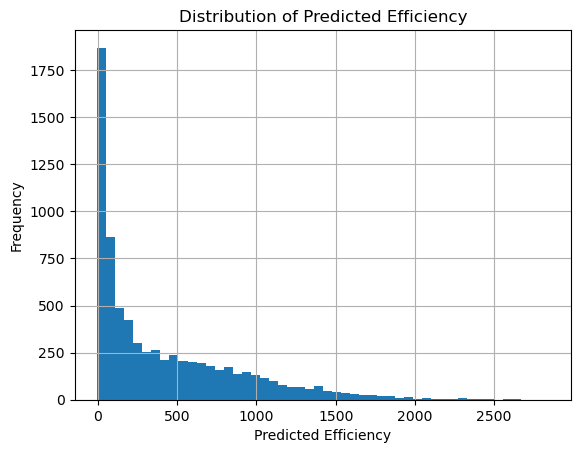

In [5]:
# Visual inspection:
# I am creating a histogram to see the distribution of the predicted values.

nba_data['predicted_efficiency'].hist(bins=50)
plt.xlabel('Predicted Efficiency')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Efficiency')
plt.show()

In [6]:
# I am interested in comparing the actual efficiency (EFF) values against
# The predicted values I am going to print the columns, player, efficiency and the predicted_efficiency

print(nba_data[['PLAYER', 'EFF', 'predicted_efficiency']].head())

            PLAYER   EFF  predicted_efficiency
0     Kevin Durant  2462           2458.252441
1      Kobe Bryant  1921           1918.836792
2     LeBron James  2446           2433.635742
3     James Harden  1872           1872.411865
4  Carmelo Anthony  1553           1550.383789


### This table shows actual and predicted efficiency scores (EFF) for a selection of NBA players.

**Player Names:** This column identifies each player by name.

**EFF (Efficiency):** This column shows the actual efficiency scores for the players. Efficiency in basketball is a comprehensive statistic that attempts to capture a player's overall impact on the game based on various metrics, including points, rebounds, assists, steals, blocks, turnovers, etc.

**Predicted Efficiency:** This column contains the efficiency scores predicted by your machine learning model based on the input features it was provided (likely player statistics from the season).

### Interpreting Specific Players:

**Kevin Durant:** An actual efficiency of 2462 compared to a predicted efficiency of 0.917. Kevin Durant's efficiency was significantly underestimated by the model.

**Kobe Bryant:** Actual efficiency is 1921, with a predicted efficiency of 1.038. Like with Durant, the prediction is significantly lower, suggesting underestimation.

**LeBron James:** Has an actual efficiency of 2446 but a predicted efficiency of 0.685, another case where the model's prediction is much lower than the actual value.

**James Harden:** Shows an actual efficiency of 1872 and a predicted efficiency of 0.625, indicating the model's prediction is lower than the actual efficiency.

**Carmelo Anthony:** With an actual efficiency of 1553 and a predicted efficiency of 0.988, the model also underestimates his efficiency, though it's closer to 1 compared to others.

### General Observations:

The predicted efficiencies appear to be on a different scale than the actual efficiencies. The model is intended to output efficiencies directly comparable to the actual EFF scores, then it might require recalibration.

In [7]:
# To get a statistical summary of the predictions,
# I am using the describe() method.
# This helpful to understand the distribution of the model's predictions.

print(nba_data['predicted_efficiency'].describe())

count    7293.000000
mean      418.160156
std       468.858459
min        -4.430271
25%        49.890915
50%       225.011963
75%       671.260010
max      2841.251953
Name: predicted_efficiency, dtype: float64


In [8]:
print(nba_data[['EFF', 'predicted_efficiency']].describe())


               EFF  predicted_efficiency
count  7293.000000           7293.000000
mean    420.107775            418.160156
std     470.334457            468.858459
min      -8.000000             -4.430271
25%      51.000000             49.890915
50%     227.000000            225.011963
75%     673.000000            671.260010
max    2862.000000           2841.251953


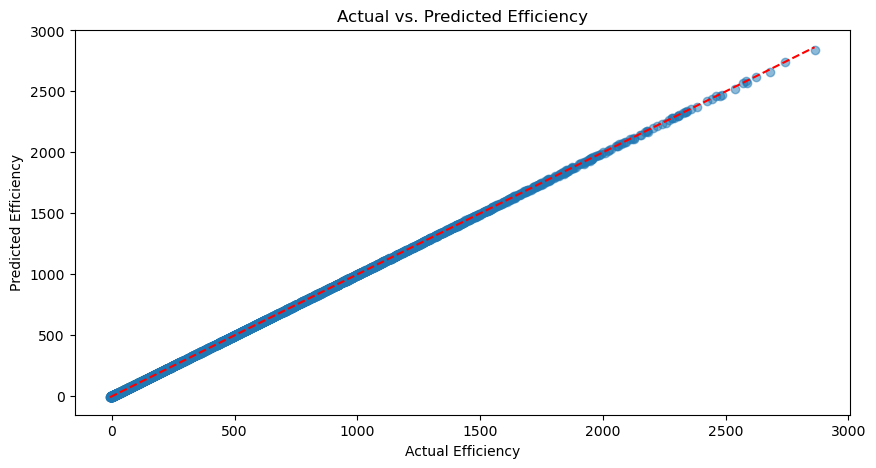

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(nba_data['EFF'], nba_data['predicted_efficiency'], alpha=0.5)
plt.title('Actual vs. Predicted Efficiency')
plt.xlabel('Actual Efficiency')
plt.ylabel('Predicted Efficiency')
plt.plot([nba_data['EFF'].min(), nba_data['EFF'].max()], [nba_data['EFF'].min(), nba_data['EFF'].max()], 'r--')
plt.show()


The scatter plot you provided shows the relationship between actual player efficiency (on the x-axis) and the efficiency predicted by your model (on the y-axis). The dashed red line represents the line of perfect prediction, where the predicted efficiency would exactly match the actual efficiency.

From what can be seen in the plot:

Concentration at Lower Values: A large number of points are concentrated around the lower end of actual efficiency values. This concentration suggests that the model has made many predictions for players with lower actual efficiency scores.

Spread of Predictions: As the actual efficiency increases, the spread of predictions also seems to increase, which indicates more variability in the model’s performance as the efficiency score rises.

Deviation from Perfect Prediction: It appears that for many players, especially those with higher efficiency scores, the model underestimates their efficiency (since most points are below the red dashed line).

Potential Outliers: There may be outliers or extreme values as suggested by isolated points away from the main cluster, especially on the higher end of actual efficiency scores.

In terms of model performance:

Underprediction for High Values: The model might systematically underpredict the efficiency for high-performing players, which could indicate that the model struggles with scaling predictions accurately for all levels of actual efficiency.

Accuracy at Lower Values: The model seems to be more accurate for players with lower efficiency scores since the points are closer to the dashed line.

To further improve the model, consider the following:

Examining Feature Influence: Investigate which features have the most impact on the predictions and consider feature engineering to better capture the relationship between input data and high-efficiency scores.

Model Complexity: Assess whether the model complexity is sufficient to capture the patterns in the data, especially for those players with higher efficiency scores.

Data Distribution: Check if there is a balanced representation of players across the efficiency score range in the training data. If high-efficiency scores are rare, the model may not learn to predict them well.

Error Analysis: Perform a detailed error analysis to understand the nature of the predictions for those points that deviate significantly from the line of perfect prediction.

This interpretation should provide insight into the model's current predictive power and highlight areas for potential improvement.